# Setting

In [1]:
from pf_utils import BacktestManager, DataManager, MomentumPortfolio

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#import FinanceDataReader as fdr
import pandas as pd
#import warnings

#warnings.filterwarnings(action='ignore', category=FutureWarning)

In [3]:
path_data = 'data'

## Implement

### class1

### testing

In [34]:
df_k200.columns.size

AttributeError: 'NoneType' object has no attribute 'columns'

# KOSPI 200

In [35]:
days_in_year = 246

## Data

In [38]:
file = 'kospi200_prices_240707l.csv'
k200 = DataManager(file, path_data)
df_k200 = k200.upload()

 200 assets from 2010-01-04 to 2024-07-05 uploaded.


In [23]:
#df_k200 = k200.download(start_date='2000', tickers=df_k200.columns)

In [24]:
#file = 'test_240707l.csv'
#k200.save(df_k200, file)

## Backtest

In [39]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = days_in_year
)
bm = BacktestManager(df_k200, **kwargs_bm)

60 assets removed for shorter periods (30.0%)


In [40]:
name = 'KOSPI'
ticker = '069500'
df_kospi = bm.util_import_data(ticker, name=name)

In [41]:
bm.benchmark(df_kospi)

RunOnce selected


In [42]:
kwargs_build = dict(
    name = 'Momentum',
    freq = 'M', select = 'Momentum', weigh = 'ERC',
    n_assets=5, lookback=12, lag=12
)
bm.build(**kwargs_build)

In [43]:
kwargs_build = dict(
    name = 'K-ratio',
    freq = 'M', select = 'K-ratio', weigh = 'ERC',
    n_assets=5, lookback=12, lag=12
)
bm.build(**kwargs_build)

Backtesting 3 strategies: KOSPI, Momentum, K-ratio


100%|█████████████████████████████████████████████████████████████████| 3/3 [04:14<00:00, 84.70s/it]

Returning stats


,KOSPI,Momentum,K-ratio
start,2010-01-03 00:00:00,2010-01-03 00:00:00,2010-01-03 00:00:00
end,2024-07-05 00:00:00,2024-07-05 00:00:00,2024-07-05 00:00:00
total_return,1.253297,35.406621,3.005451
cagr,0.057617,0.281297,0.100412
calmar,0.151281,0.515125,0.144371
max_drawdown,-0.380858,-0.546075,-0.695514
avg_drawdown,-0.034019,-0.065681,-0.046761
avg_drawdown_days,79.328125,47.237113,91.230769
daily_vol,0.170957,0.339247,0.248019
daily_sharpe,0.420096,0.915385,0.517998


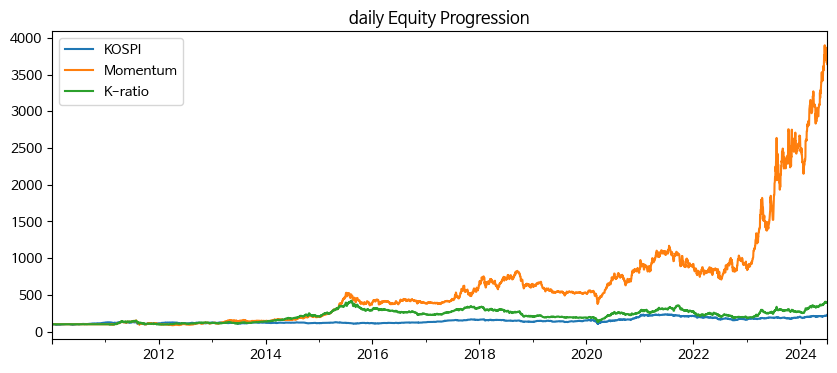

In [44]:
bm.run(figsize=(10,4))

## Balance

In [7]:
k200 = MomentumPortfolio(df_k200, days_in_year)

15 assets removed for shorter periods (7.5%)


In [10]:
k200.select('2024-06-01')
k200.weigh()
h = k200.balance()

In [13]:
k200.select()
k200.weigh()
k200.balance(h.balance)

,price,transaction,balance
001570,"82,800",0,17
002710,"53,500",-3,30
042700,"160,200",0,12
138040,"83,400",-3,32
267260,"311,000",-1,6
